# Tokenization of Text in NLP
* Notebook by Adam Lang
* Date: 3/14/2024
* We will review classic tokenization techniques for NLP in Python.

# Important Takeaways from this notebook
1. We are only going to compare the Python `.split()` which is a whitespace tokenizer method and the `spacy tokenizer`.
2. However, these 2 techniques will demonstrate the significant differences between tokenizers.
3. We will see the `.split()` whitespace method is not able to tokenize important linguistic features such as:
    * punctuation
    * contractions
    * abbreviations
    * special characters
    * etc..

4. Although you can specify what to split a sentence on within the `.split()` method, it is important to still understand the outright limitations of this.
5. This is important to consider when performing basic NLP tokenization tasks or even when building an LLM application as your text may have various features that require special tokenizers.
6. Therefore it is important to understand what you are tokenizing and why and whether it is important to treat special characters and related linguistic features as invidiual tokens or combined n-grams.

## Whitespace Tokenizer

In [1]:
# define a string
text = "I'm working as a Data Scientist in the U.S. earning $140,000."

In [2]:
# Whitespace tokenizer
print(text.split())

["I'm", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'earning', '$140,000.']


summary:
* Whitespace tokenize is not very accurate in splitting tokens.

## spaCy Tokenizer

In [4]:
# import spaCy
import spacy

In [5]:
# load spacy language model
nlp = spacy.load('en_core_web_sm')

In [6]:
# let's create a Doc object in spacy - not a token
doc = nlp(text)

In [7]:
doc

I'm working as a Data Scientist in the U.S. earning $140,000.

In [8]:
# use spacy tokenizer
print([token for token in doc])

[I, 'm, working, as, a, Data, Scientist, in, the, U.S., earning, $, 140,000, .]


In [9]:
# print type of above objects
[type(token) for token in doc]

[spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token]

summary:
* Above we can see these are token objects but not strings.
* If you want strings you need to use the `token.text` function in spacy.

In [14]:
# tokens as string in spacy
print([token.text for token in doc])

['I', "'m", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'earning', '$', '140,000', '.']


## Comparing Whitespace and spaCy Tokenizer

In [15]:
# Whitespace Tokenizer
print(text.split())

# spacy tokenizer
print([token.text for token in doc])

["I'm", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'earning', '$140,000.']
['I', "'m", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'earning', '$', '140,000', '.']


Summary of comparison:
* spacy tokenizer is able to semantically determine "I'm" is "I am" and splits this into 2 tokens.
* It also does this with special characters such as the $ sign.

In [16]:
# let's look at number of tokens returned by each

# num of tokens - Whitespace tokenizer
print(len(text.split()))

# num of tokens - spacy tokenizer
print(len(doc))




11
14


## A few more examples of Whitespace vs. spaCy tokenizer

In [17]:
text = "My phone has a 10% batter left."

# Whitespace tokenizer
print(text.split())

# spaCy Tokenizer - apply nlp function
print([token.text for token in nlp(text)])

['My', 'phone', 'has', 'a', '10%', 'batter', 'left.']
['My', 'phone', 'has', 'a', '10', '%', 'batter', 'left', '.']


Summary:
* The main takeaway here is the spacy tokenizer treats special characters such as "%" and "." as individual tokens and the whitespace tokenizer does not.

In [18]:
# another example
text = "I ran 10km today."

# Whitespace Tokenizer
print(text.split())

# spacy tokenizer
print([token.text for token in nlp(text)])

['I', 'ran', '10km', 'today.']
['I', 'ran', '10', 'km', 'today', '.']


Summary:
* We can see the spacy tokenizer recognizes the metric units "km" as a separate token" as well as the ".".

In [20]:
# another comparison example
text = "I know HTML, CSS, JavaScript, C++, and Node.js."

# Whitespace Tokenizer
print(text.split())

# spacy tokenizer
print([token.text for token in nlp(text)])

['I', 'know', 'HTML,', 'CSS,', 'JavaScript,', 'C++,', 'and', 'Node.js.']
['I', 'know', 'HTML', ',', 'CSS', ',', 'JavaScript', ',', 'C++', ',', 'and', 'Node.js', '.']


Summary:
* The spacy tokenizer treats commas "," and other punctuation as separate tokens.

# spaCy Tokenizer - Overview
* Algorithm behind SpaCy Tokenizer
  1. Split text on whitespaces and iterate over whitespace-separated substrings.
  2. Look for token match. If a match is found, stop processing and keep as token.
  3. Check if it is a "special case" such as:
      * U.K. (abbreviation)
      * We're (contraction)
  4. Try to consume a prefix like: $` (and go to step 2.
  5. If did not consume prefix, try to consume suffix like !, % and go to step 2.
  6. If can't consume a prefix or a suffix, then check if it's a URL and keep it as a token.
  7. If not a URL, then again check for special cases (step 3).
  8. Look for infixes like: "-", "/", etc. and split substring on all infixes and tokens.
  9. Can't do anything? Handle it as a token.


### Example using the algorithm above

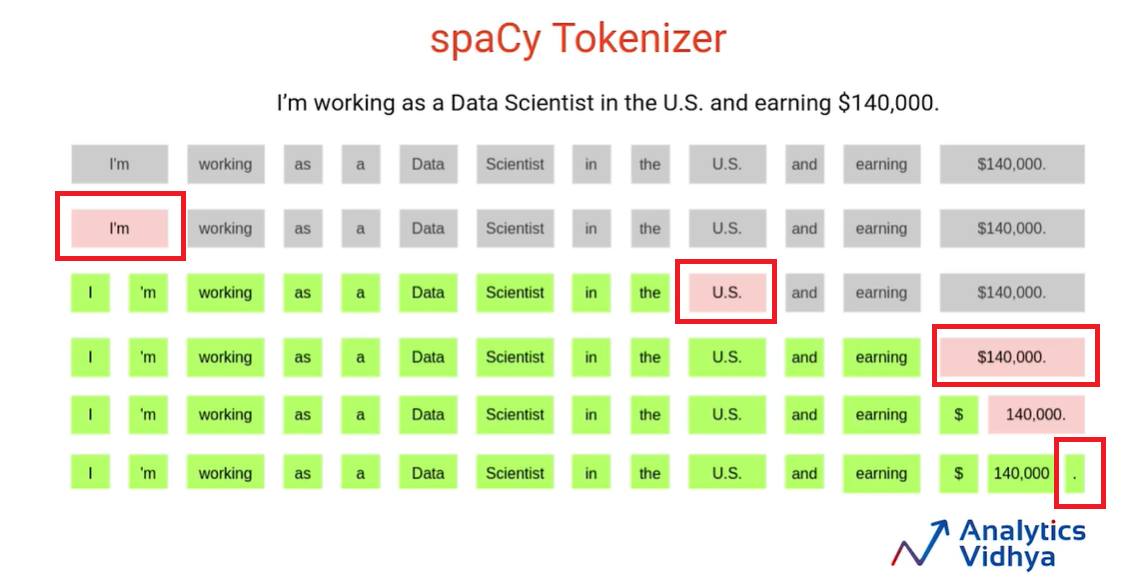

### Another example

Text= ”Just in a few years, natural language processing has evolved into something so powerful and impactful, which no one could have imagined.”

Perform the following tasks on the above text:


Task 1: ”Tokenize it using whitespace tokenizer.”

In [21]:
text = "Tokenize it using whitespace tokenizer."

# Whitespace tokenizer
print(text.split())

# spacy tokenizer
print([token.text for token in nlp(text)])

['Tokenize', 'it', 'using', 'whitespace', 'tokenizer.']
['Tokenize', 'it', 'using', 'whitespace', 'tokenizer', '.']


Summary:
* We can see the difference was the punctuation "." is a separate token using spacy's tokenizer.

Task 2: “Tokenize it using spacy’s tokenizer.”

In [23]:
text = "Tokenize it using spacy's tokenizer."

# Whitespace tokenizer
print(text.split())

# spacy tokenizer
print([token.text for token in nlp(text)])

['Tokenize', 'it', 'using', "spacy's", 'tokenizer.']
['Tokenize', 'it', 'using', 'spacy', "'s", 'tokenizer', '.']


Summary:
* We can see the contraction "Spacy's" was handled as 2 separate tokens in addition to the punctuation ".".